In [1]:
#pip install pytorch-tabnet

  Obtaining dependency information for pytorch-tabnet from https://files.pythonhosted.org/packages/0f/92/ed98b89b7cf5661656daa4cc88e578f712eb5eae41b8f46a56c1ece3a895/pytorch_tabnet-4.1.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 152.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm

# 讀取 CSV 文件
df = pd.read_csv('/Users/ccit0915/Desktop/kaggle/客戶流失預測/WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding='utf-8')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


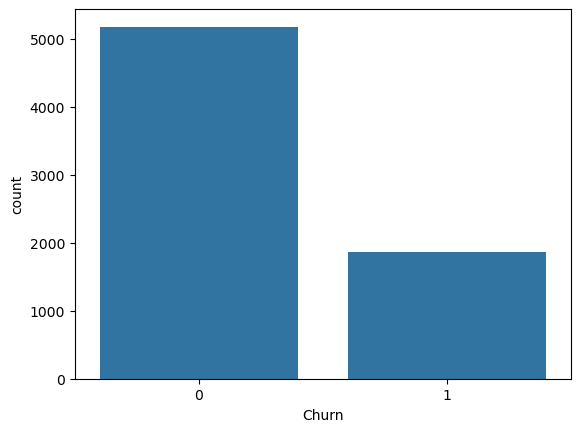

In [3]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
sns.countplot(x='Churn', data=df)
plt.show()

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.drop(columns=['customerID'], inplace=True)

In [7]:
import pandas as pd

# 需要轉換的二元特徵
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", 
               "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies"]

# 統一 "No internet service" 為 "No"
df[binary_cols] = df[binary_cols].replace("No internet service", "No")

# **使用 replace() 轉換 Yes/No，顯式使用 astype(int) 來確保數據類型**
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0}).astype(int)

# **修正性別轉換**
df["gender"] = df["gender"].map({"Male": 1, "Female": 0}).astype(int)

# **修正 MultipleLines（顯式轉換型別）**
df["MultipleLines"] = df["MultipleLines"].replace(
    {"No": 0, "Yes": 1, "No phone service": 0}
).astype(int)

# **轉換 TotalCharges 為數值，並填補 NaN**
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)
pd.set_option('future.no_silent_downcasting', True)

# 進行 One-Hot Encoding
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)

# 轉換布林值為整數
df = df.astype({col: 'int' for col in df.select_dtypes(include=['bool', 'uint8']).columns})

/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_66322/1302465994.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0}).astype(int)
/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_66322/1302465994.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MultipleLines"] = df["MultipleLines"].replace(


In [9]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import contextlib
import sys

# 定義選擇的 8 個特徵
selected_features_8 = {'Contract_Two year', 'MonthlyCharges', 
                       'InternetService_Fiber optic', 'tenure', 
                       'PaymentMethod_Electronic check', 'TotalCharges', 
                       "SeniorCitizen", "Contract_One year"}

# 讀取資料
X = df.drop(columns=['Churn'])
y = df['Churn']

# 只保留 selected_features_8 的欄位
X_selected = X[list(selected_features_8)]

# 切分資料
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 建立並訓練 TabNet 模型
model = TabNetClassifier()

with contextlib.redirect_stdout(sys.stdout):  # 靜音訓練過程
    model.fit(X_train.values, y_train.values)

# 預測與評估
y_pred = model.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=== 🎯 selected_features_8 模型評估結果 ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.53026 |  0:00:00s
epoch 1  | loss: 0.45555 |  0:00:00s
epoch 2  | loss: 0.44381 |  0:00:00s
epoch 3  | loss: 0.43585 |  0:00:00s
epoch 4  | loss: 0.44036 |  0:00:00s
epoch 5  | loss: 0.43893 |  0:00:00s
epoch 6  | loss: 0.43229 |  0:00:00s
epoch 7  | loss: 0.42696 |  0:00:00s
epoch 8  | loss: 0.42936 |  0:00:00s
epoch 9  | loss: 0.42895 |  0:00:00s
epoch 10 | loss: 0.42679 |  0:00:00s
epoch 11 | loss: 0.42111 |  0:00:00s
epoch 12 | loss: 0.41965 |  0:00:00s
epoch 13 | loss: 0.42009 |  0:00:00s
epoch 14 | loss: 0.42461 |  0:00:01s
epoch 15 | loss: 0.42304 |  0:00:01s
epoch 16 | loss: 0.42404 |  0:00:01s
epoch 17 | loss: 0.42241 |  0:00:01s
epoch 18 | loss: 0.41974 |  0:00:01s
epoch 19 | loss: 0.4195  |  0:00:01s
epoch 20 | loss: 0.42493 |  0:00:01s
epoch 21 | loss: 0.42582 |  0:00:01s
epoch 22 | loss: 0.4235  |  0:00:01s
epoch 23 | loss: 0.42081 |  0:00:01s
epoch 24 | loss: 0.42436 |  0:00:01s
epoch 25 | loss: 0.42059 |  0:00:01s
epoch 26 | loss: 0.42916 |  0:00:01s
e

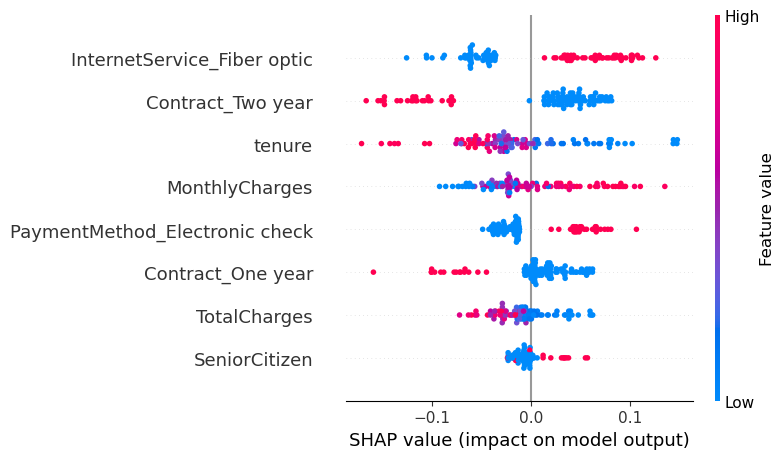

In [20]:
shap.summary_plot(shap_values[:, :, 1], X_test.iloc[:100], feature_names=X_test.columns)

In [26]:
y_pred = model.predict(X_test.values)

# 轉成 DataFrame 以便操作
X_test_df = X_test.copy()
X_test_df['y_true'] = y_test.values
X_test_df['y_pred'] = y_pred

# 篩選：預測為 1，實際也為 1
correct_positives = X_test_df[(X_test_df['y_pred'] == 1) & (X_test_df['y_true'] == 1)]

In [30]:
# 先對前 100 筆樣本做預測
X_small = X_test.iloc[:100]
y_small = y_test.iloc[:100]

y_pred = model.predict(X_small.values)

# 建立一個 DataFrame 方便篩選
df_small = X_small.copy()
df_small['y_true'] = y_small.values
df_small['y_pred'] = y_pred

# 篩選預測為 1 且實際為 1 的樣本
correct_positives = df_small[(df_small['y_pred'] == 1) & (df_small['y_true'] == 1)]

In [32]:
# 取得第一筆正確預測為 1 的樣本（位置索引，不是原始 index）
row_idx = correct_positives.index[0]
relative_idx = X_small.index.get_loc(row_idx)  # 取得這筆在 shap_values 中的對應位置

# 抓出 SHAP 值與該樣本的特徵值
shap_values_single = shap_values[relative_idx, :, 1]
x_single = X_small.iloc[relative_idx]

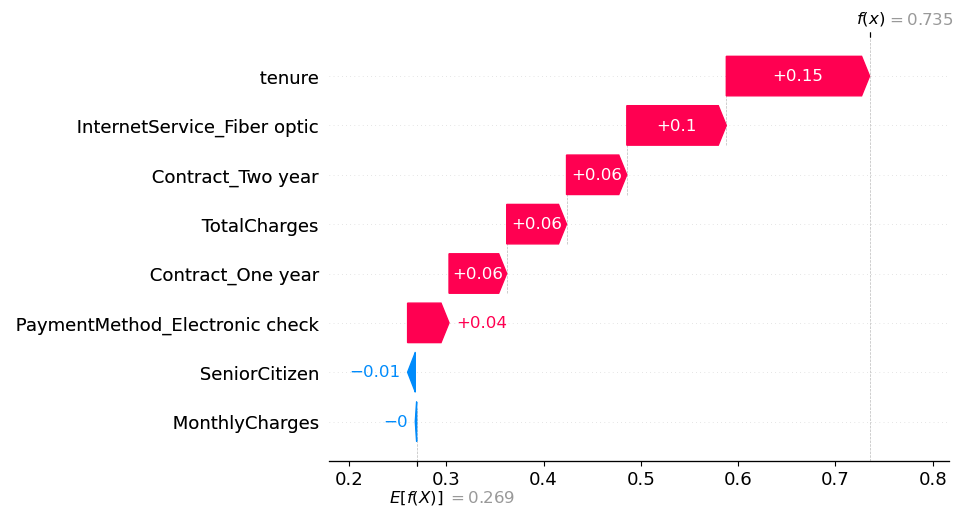

In [34]:
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value[1],
    shap_values=shap_values_single,
    features=x_single,
    feature_names=X_test.columns
)

In [42]:
# 假設 X_small 和 y_test 的索引匹配，這樣我們就能逐元素比較
y_test_aligned = y_test.loc[X_small.index]

# 找出預測為 0，但實際為 1 的樣本
false_negatives = X_small[(y_pred == 0) & (y_test_aligned == 1)]

# 取得第一筆預測為 0，但實際為 1 的樣本（位置索引，不是原始 index）
row_idx = false_negatives.index[0]
relative_idx = X_small.index.get_loc(row_idx)  # 取得這筆在 shap_values 中的對應位置

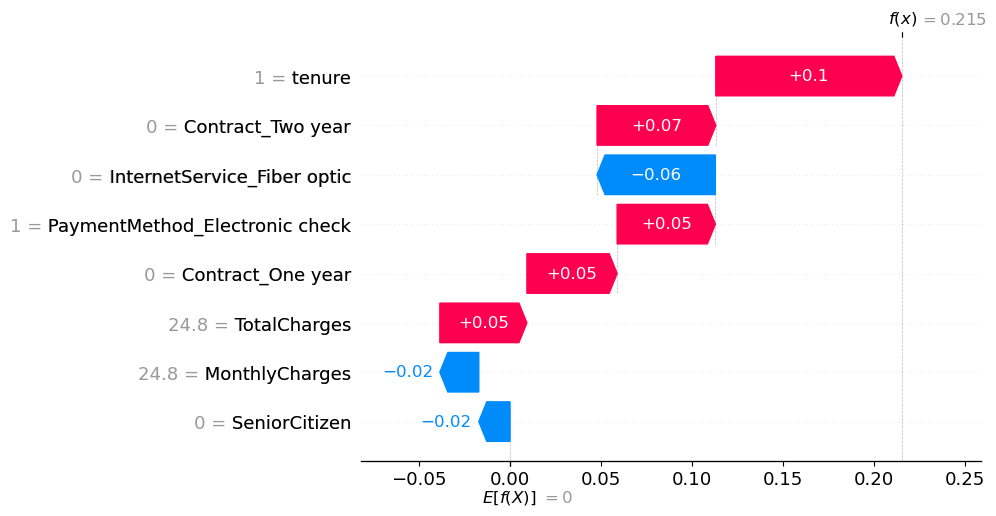

In [46]:
import shap

# 取得 SHAP 值與該樣本的特徵值
shap_values_single = shap_values[relative_idx, :, 1]
x_single = X_small.iloc[relative_idx]

# 計算該樣本的預測值（例如使用訓練好的模型預測該樣本）
model_prediction = model.predict(x_single.values.reshape(1, -1))  # 假設你已經訓練好了模型

# 創建 SHAP Explanation 物件，並設置 base_values 為該樣本的預測結果
shap_single_explanation = shap.Explanation(values=shap_values_single, 
                                           data=x_single.values, 
                                           feature_names=X_small.columns,
                                           base_values=model_prediction[0])  # 設定 base_values

# 畫出該樣本的 SHAP waterfall plot
shap.waterfall_plot(shap_single_explanation)